In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sn
%matplotlib inline
from scipy.optimize import curve_fit
from scipy import integrate, optimize
import warnings
warnings.filterwarnings("ignore")

In [2]:
dfall=pd.read_csv("C:\\Users\\charu\\WHO-COVID-19-global-data.csv")
dfall.head()

Date_reported Country_code      Country WHO_region  New_cases  \
0      1/3/2020           AF  Afghanistan       EMRO          0   
1      1/4/2020           AF  Afghanistan       EMRO          0   
2      1/5/2020           AF  Afghanistan       EMRO          0   
3      1/6/2020           AF  Afghanistan       EMRO          0   
4      1/7/2020           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

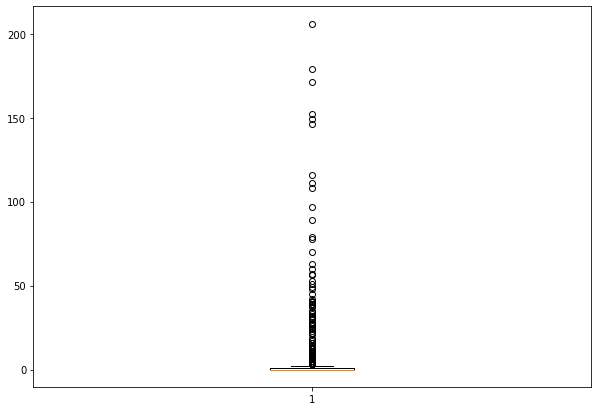

In [3]:
df = dfall[(dfall['Country_code']=='NO')]

df.drop(['Country_code','WHO_region','Date_reported'],axis=1,inplace=True)


fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['New_deaths'])
plt.show()

df['date'] = pd.date_range(start='1/3/2020', periods=len(df), freq='D')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


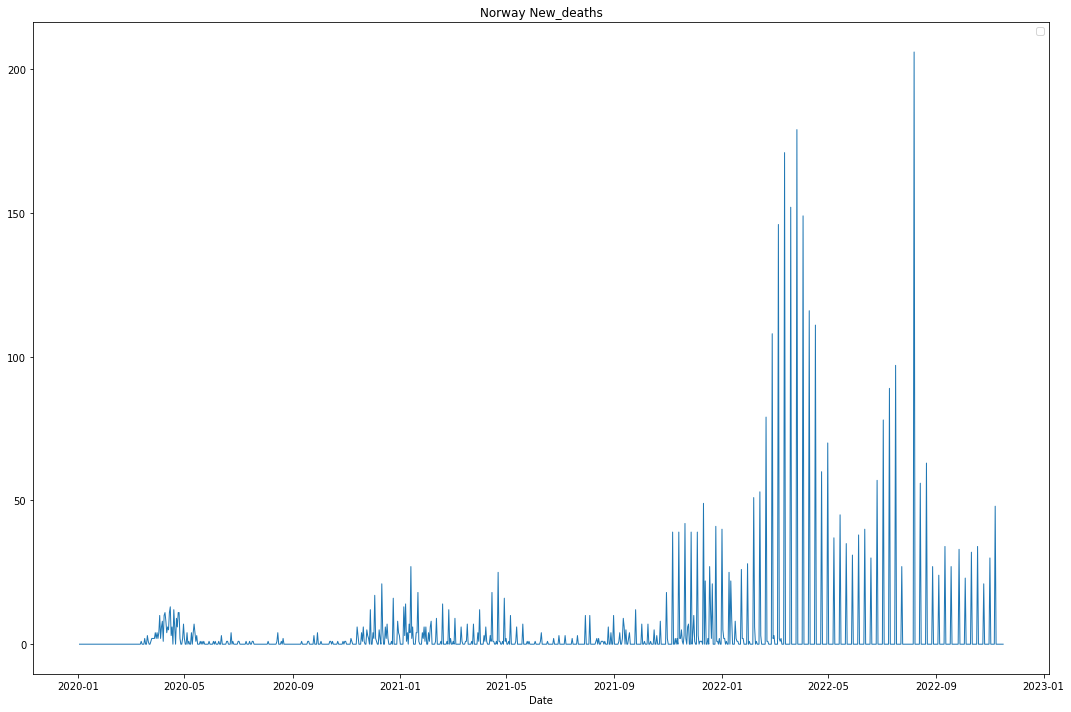

In [4]:
df= df.set_index("date")

plt.figure(figsize=(15,10))

plt.plot(df["New_deaths"],linewidth=1)

plt.xlabel("Date")
plt.title("Norway New_deaths")
plt.tight_layout()
plt.legend()
plt.show()

In [5]:
population = float(1)

# Peak 01 - (2020-02-27 to 2020-07-20)

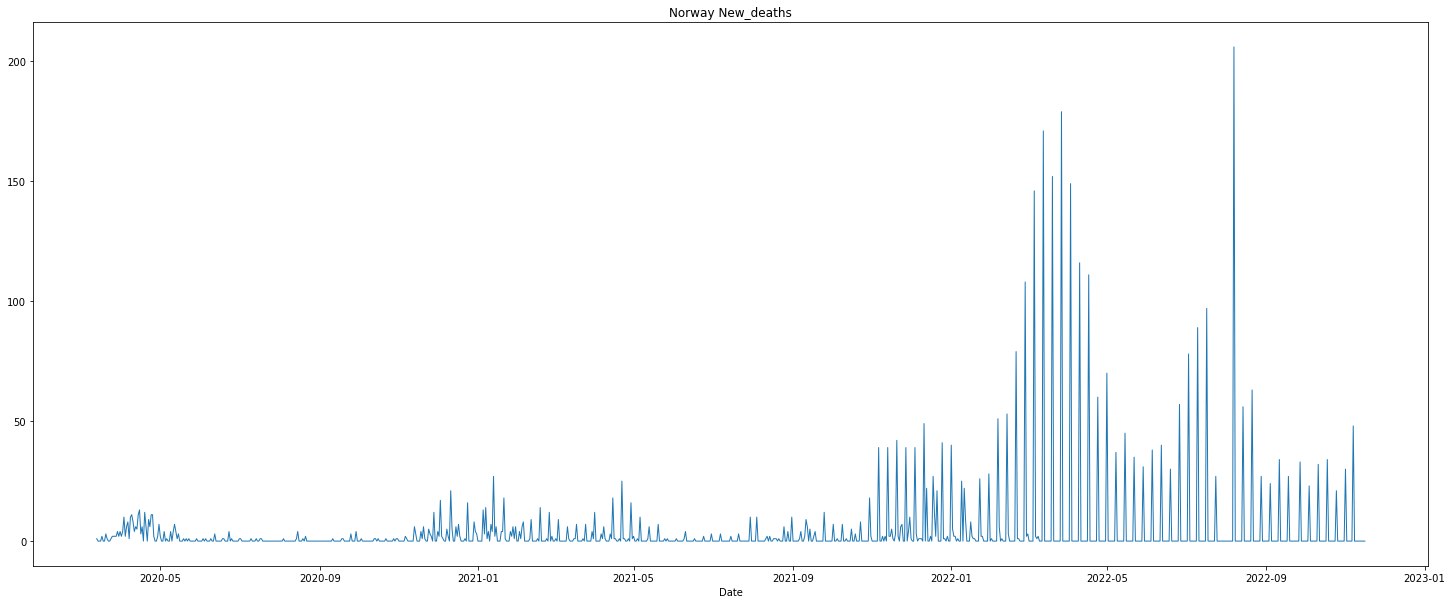

In [6]:
P1 = df.iloc[70:,:]

plt.figure(figsize=(25,10))
plt.plot(P1["New_deaths"],linewidth=1)
plt.xlabel("Date")
plt.title("Norway New_deaths")
plt.show()

In [7]:
P1.head(20)

Country  New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
date                                                                          
2020-03-13  Norway        206              1117           1                  1
2020-03-14  Norway        147              1264           0                  1
2020-03-15  Norway        100              1364           0                  1
2020-03-16  Norway         99              1463           0                  1
2020-03-17  Norway        180              1643           2                  3
2020-03-18  Norway        176              1819           0                  3
2020-03-19  Norway        213              2032           0                  3
2020-03-20  Norway        239              2271           3                  6
2020-03-21  Norway        308              2579           1                  7
2020-03-22  Norway        174              2753           0                  7
2020-03-23  Norway        148              2901           0                  7
2020-03-24  Norway        296              3197           1                  8
2020-03-25  Norway        313              3510           2                 10
2020-03-26  Norway        292              3802           2                 12
2020-03-27  Norway        298              4100           2                 14
2020-03-28  Norway        262              4362           2                 16
2020-03-29  Norway        166              4528           4                 20
2020-03-30  Norway        106              4634           2                 22
2020-03-31  Norway        264              4898           4                 26
2020-04-01  Norway        208              5106           2                 28

<AxesSubplot:xlabel='date'>

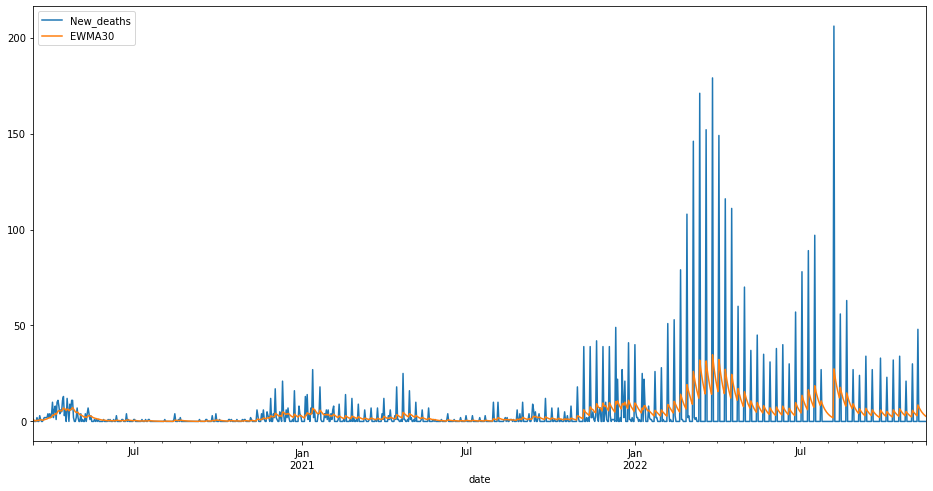

In [8]:
reliance1 = P1['New_deaths'].to_frame()
reliance1['EWMA30'] = reliance1['New_deaths'].ewm(span=15).mean()

reliance1[['New_deaths', 'EWMA30']].plot(label='Smoothed Peak 1',figsize=(16, 8))


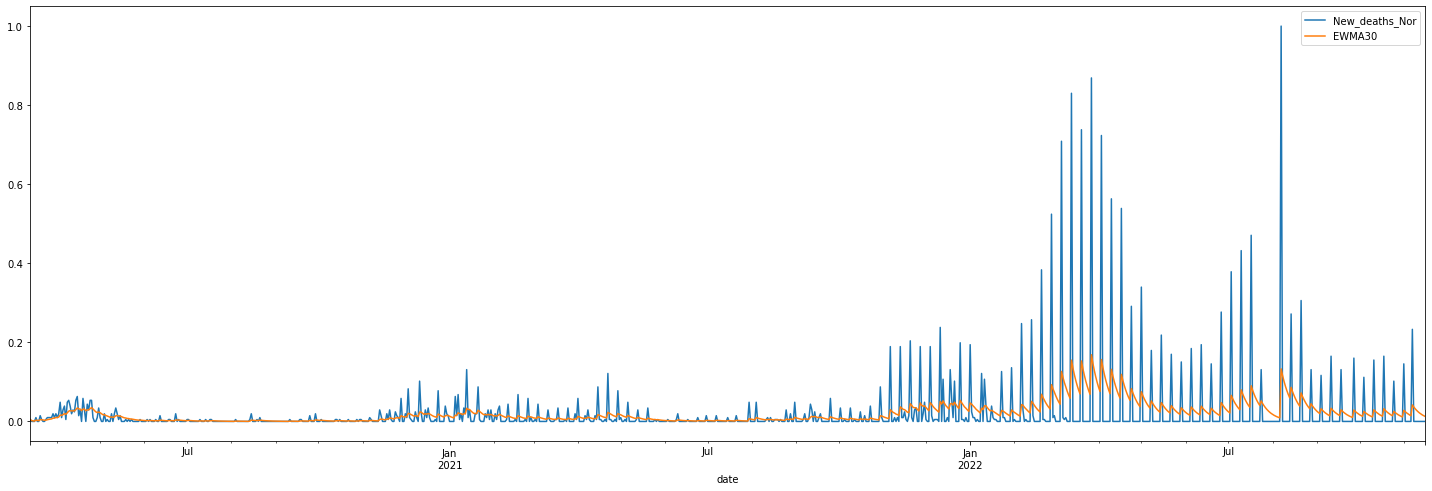

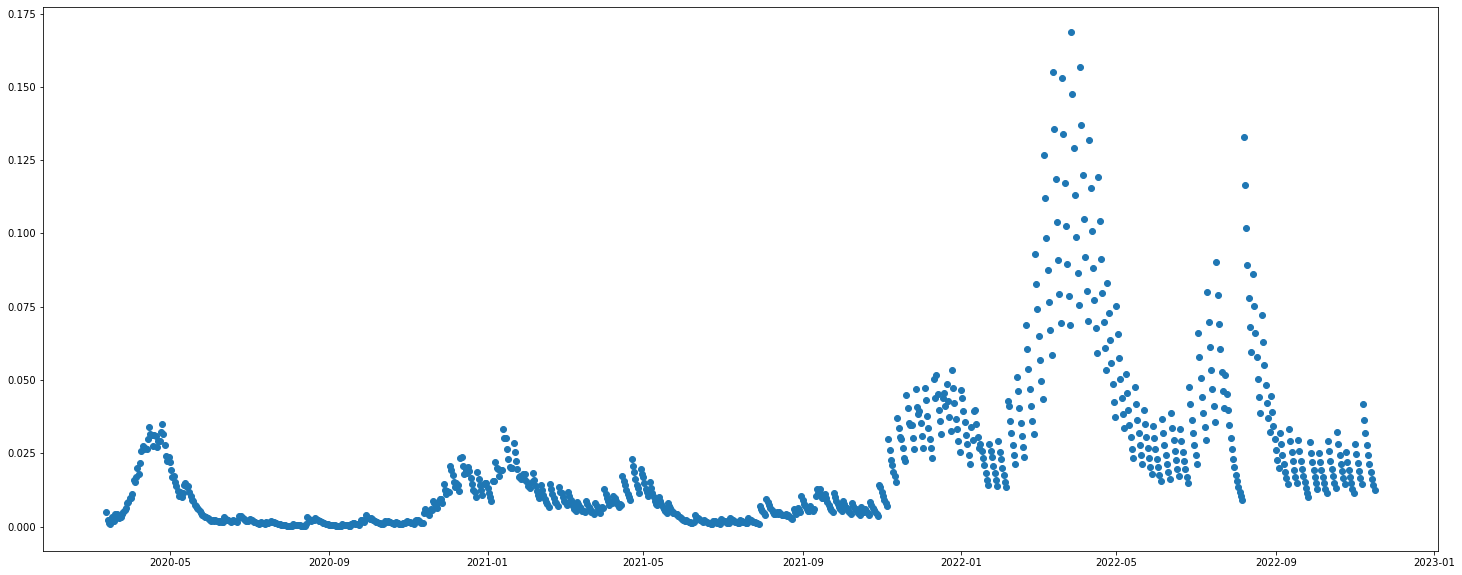

In [9]:
from sklearn import preprocessing

x = P1['New_deaths'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled1 = min_max_scaler.fit_transform(x.reshape(-1,1))
P1["New_deaths_Nor"]=x_scaled1

reliance1 = P1['New_deaths_Nor'].to_frame()
reliance1['EWMA30'] = reliance1['New_deaths_Nor'].ewm(span=15).mean()

reliance1[['New_deaths_Nor', 'EWMA30']].plot(label='Normalized Smoothed Peak 1',figsize=(25, 8))

plt.figure(figsize=(25,10))
plt.scatter(reliance1.index,reliance1["EWMA30"])
plt.show()



In [10]:
reliance1.EWMA30.count

<bound method Series.count of date
2020-03-13    0.004854
2020-03-14    0.002265
2020-03-15    0.001407
2020-03-16    0.000982
2020-03-17    0.003222
                ...   
2022-11-12    0.021423
2022-11-13    0.018745
2022-11-14    0.016402
2022-11-15    0.014352
2022-11-16    0.012558
Name: EWMA30, Length: 979, dtype: float64>

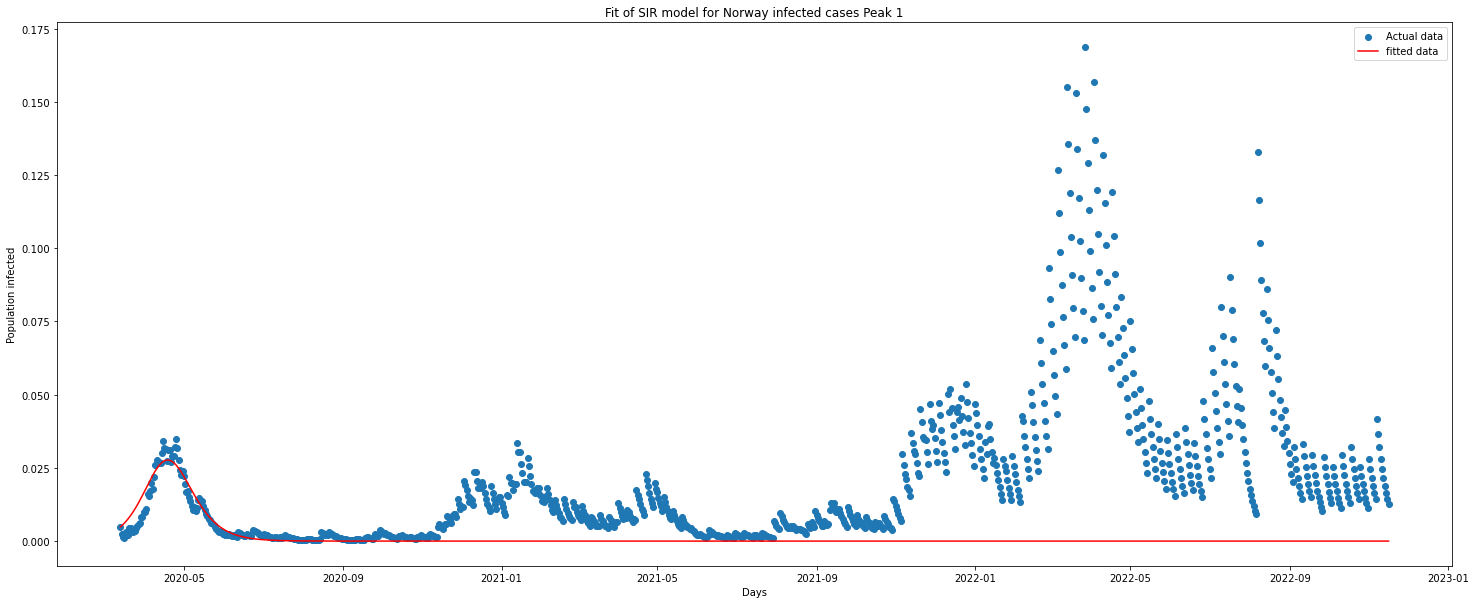

Optimal parameters: beta = 0.37792869706147486  and gamma =  0.2984781571608607


In [11]:
ydata = [i for i in reliance1.EWMA30]
ydata = np.array(ydata, dtype=float)
xdata = np.linspace(0,979,979)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    beta >= 0
    gamma >= 0
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.figure(figsize=(25,10))
plt.scatter(reliance1.index,reliance1["EWMA30"],label='Actual data')
plt.plot(reliance1.index, fitted,'r',label='fitted data')
plt.title("Fit of SIR model for Norway infected cases Peak 1")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.legend()
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# Peak 02 - (2020-07-21 to 2020-12-09)

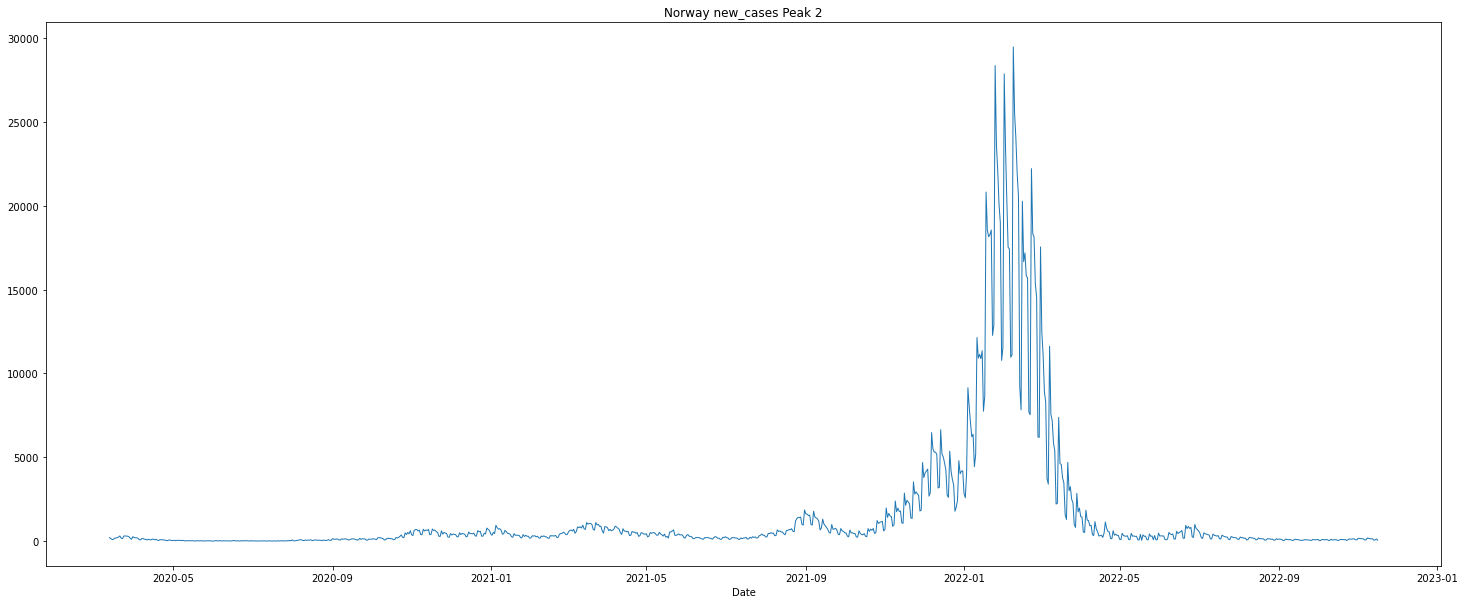

In [12]:
P2 = df.iloc[200:342,:]

plt.figure(figsize=(25,10))
plt.plot(P1["New_cases"],linewidth=1)
plt.xlabel("Date")
plt.title("Norway new_cases Peak 2")
plt.show()

<AxesSubplot:xlabel='date'>

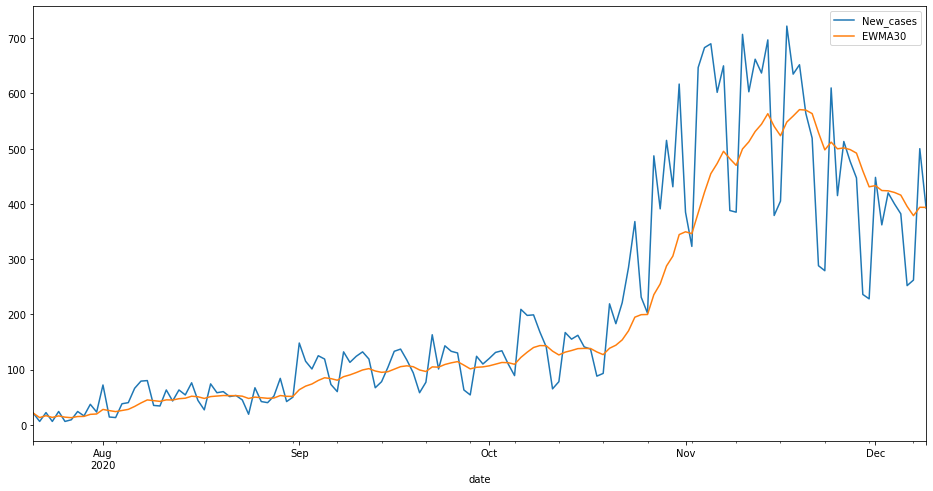

In [13]:
reliance2 = P2['New_cases'].to_frame()
reliance2['EWMA30'] = reliance2['New_cases'].ewm(span=15).mean()

reliance2[['New_cases', 'EWMA30']].plot(label='Smoothed Peak 2',figsize=(16, 8))

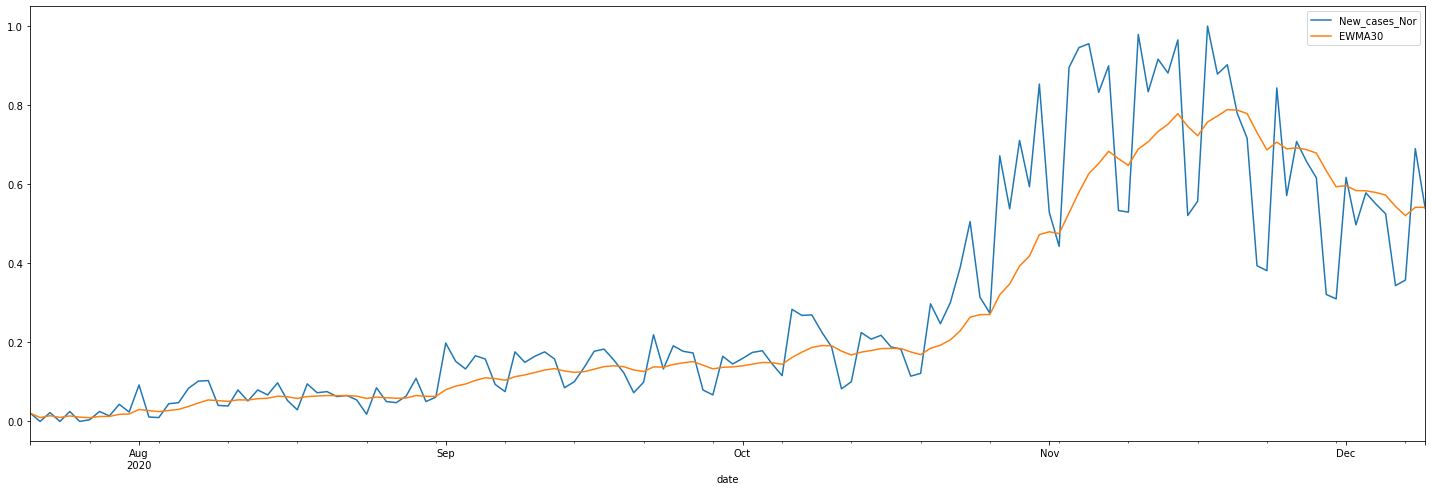

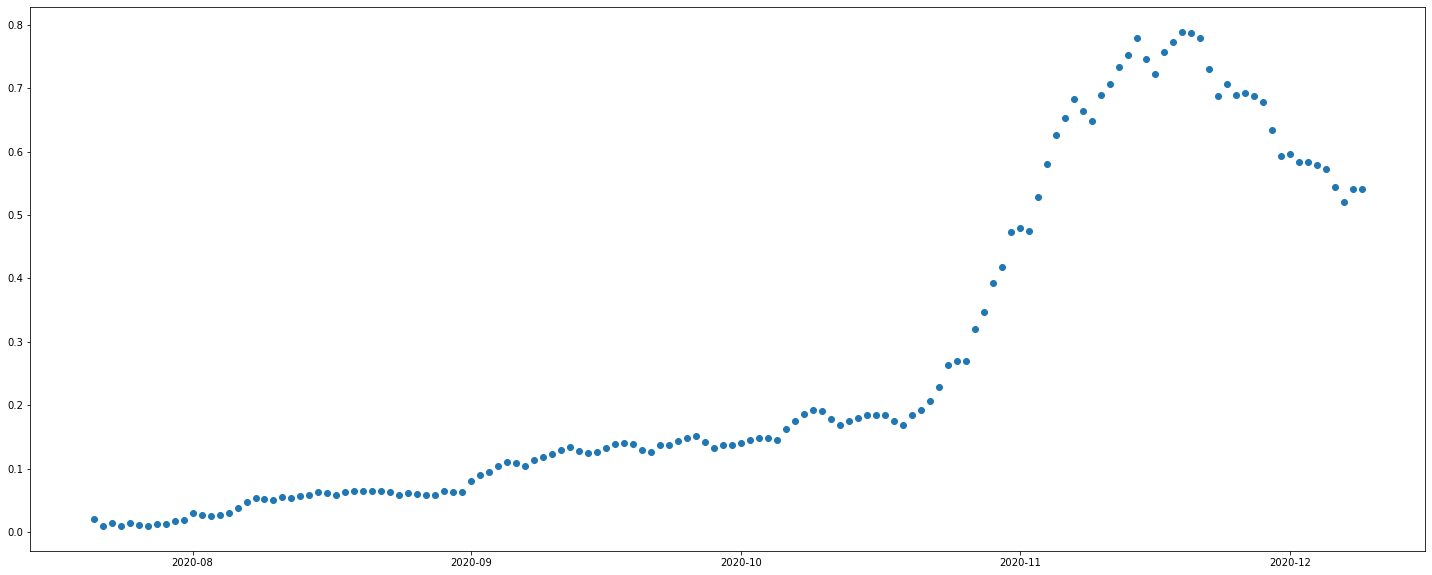

In [14]:
x2 = P2['New_cases'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler.fit_transform(x2.reshape(-1,1))
P2["New_cases_Nor"]=x_scaled2

reliance2 = P2['New_cases_Nor'].to_frame()
reliance2['EWMA30'] = reliance2['New_cases_Nor'].ewm(span=15).mean()

reliance2[['New_cases_Nor', 'EWMA30']].plot(label='Normalized Smoothed Peak 2',figsize=(25, 8))

plt.figure(figsize=(25,10))
plt.scatter(reliance2.index,reliance2["EWMA30"])
plt.show()

In [15]:
reliance2.EWMA30.count

<bound method Series.count of date
2020-07-21    0.020950
2020-07-22    0.009777
2020-07-23    0.014537
2020-07-24    0.010146
2020-07-25    0.013994
                ...   
2020-12-05    0.572443
2020-12-06    0.543835
2020-12-07    0.520548
2020-12-08    0.541722
2020-12-09    0.541395
Name: EWMA30, Length: 142, dtype: float64>

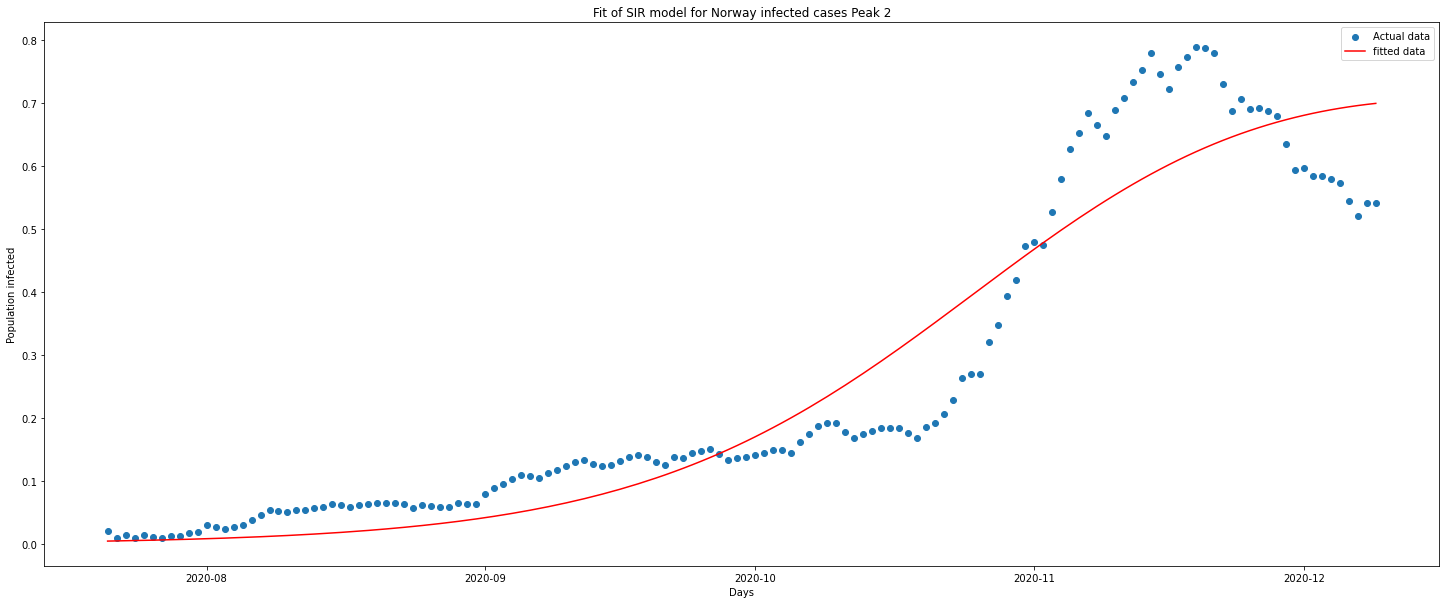

Optimal parameters: beta = 0.05695632755061746  and gamma =  0.004845394052427646


In [16]:
ydata2 = [i for i in reliance2.EWMA30]
ydata2 = np.array(ydata2, dtype=float)
xdata2 = np.linspace(0,142,142)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    beta >= 0
    gamma >= 0
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata2, ydata2)
fitted2 = fit_odeint(xdata2, *popt)

plt.figure(figsize=(25,10))
plt.scatter(reliance2.index,reliance2["EWMA30"],label='Actual data')
plt.plot(reliance2.index, fitted2,'r',label='fitted data')
plt.title("Fit of SIR model for Norway infected cases Peak 2")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.legend()
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# Peak 03 - (2020-12-10 to 2021-02-15) / Alpha Variant

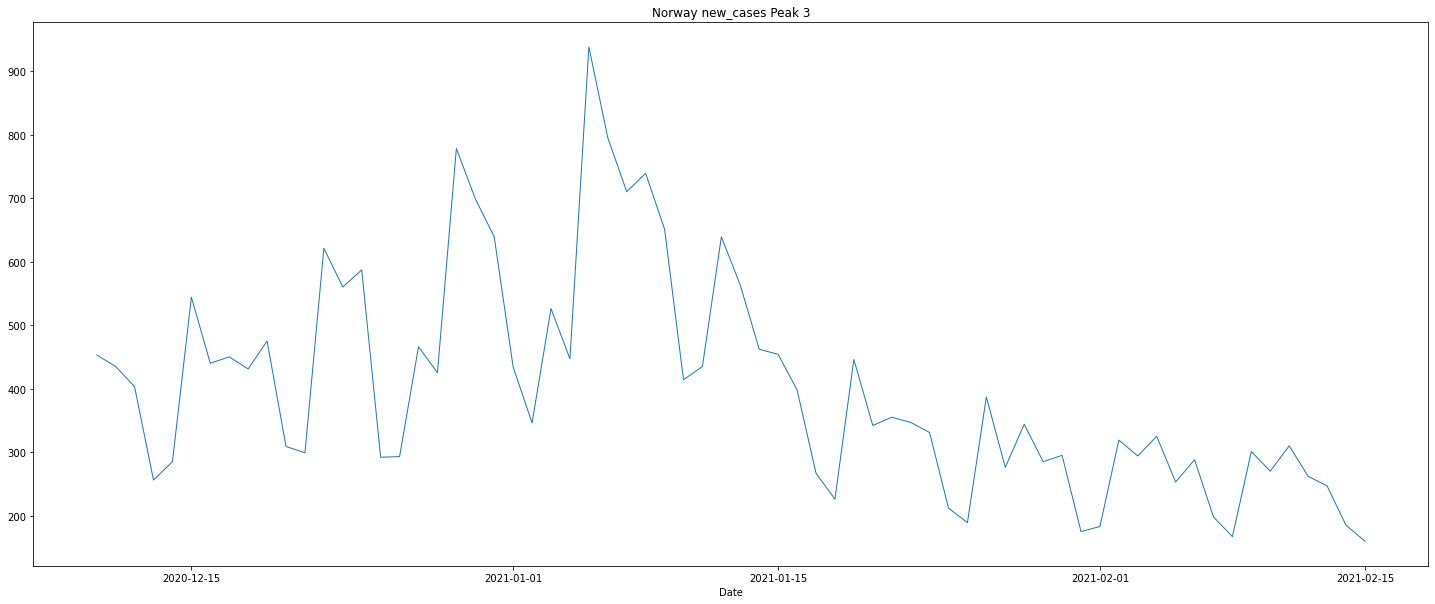

In [17]:
P3 = df.iloc[342:410,:]

plt.figure(figsize=(25,10))
plt.plot(P3["New_cases"],linewidth=1)
plt.xlabel("Date")
plt.title("Norway new_cases Peak 3")
plt.show()


<AxesSubplot:xlabel='date'>

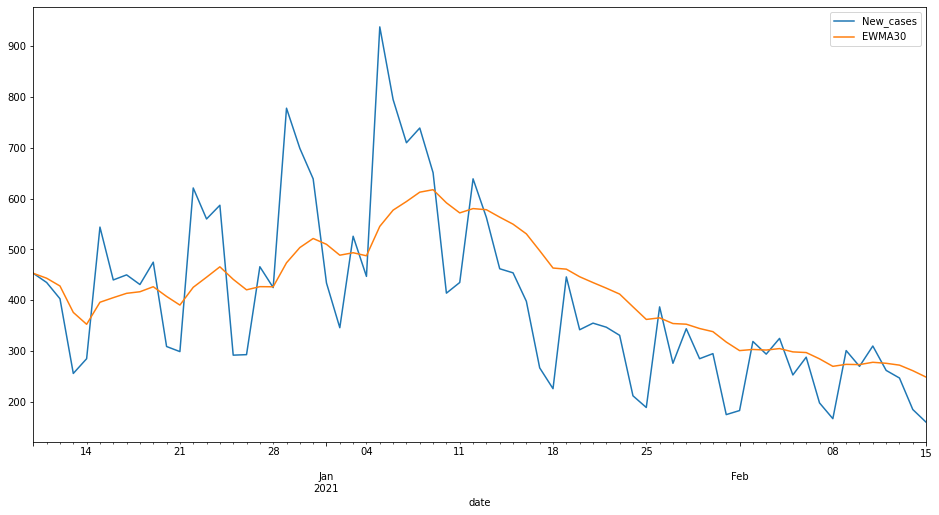

In [18]:
reliance3 = P3['New_cases'].to_frame()
reliance3['EWMA30'] = reliance3['New_cases'].ewm(span=15).mean()

reliance3[['New_cases', 'EWMA30']].plot(label='Smoothed Peak 3',figsize=(16, 8))

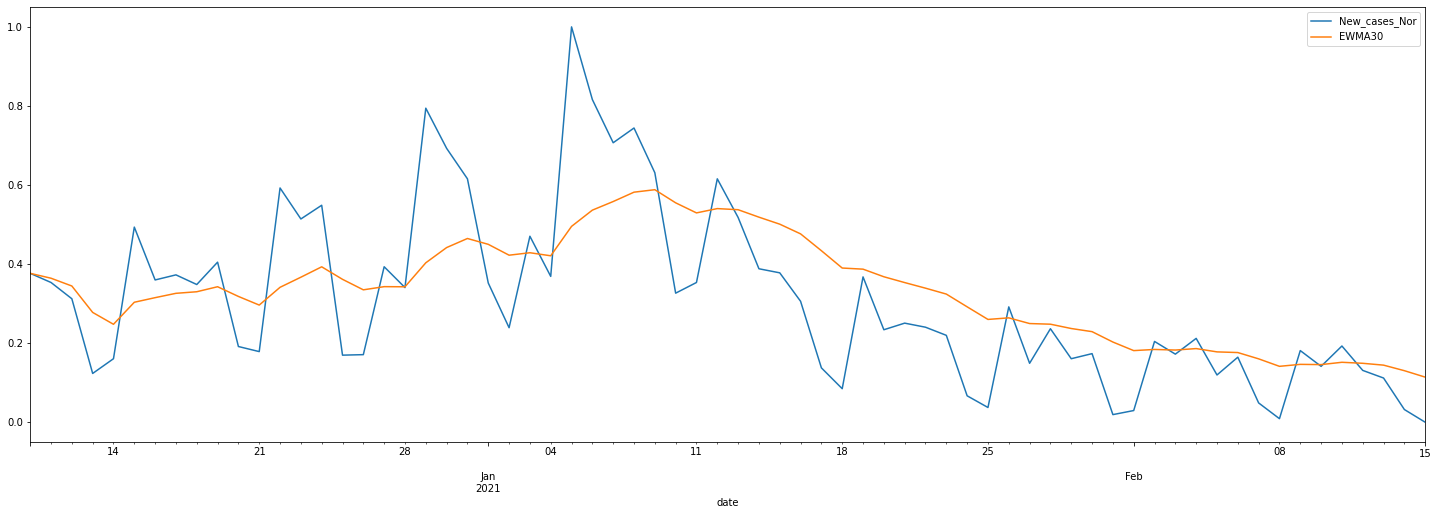

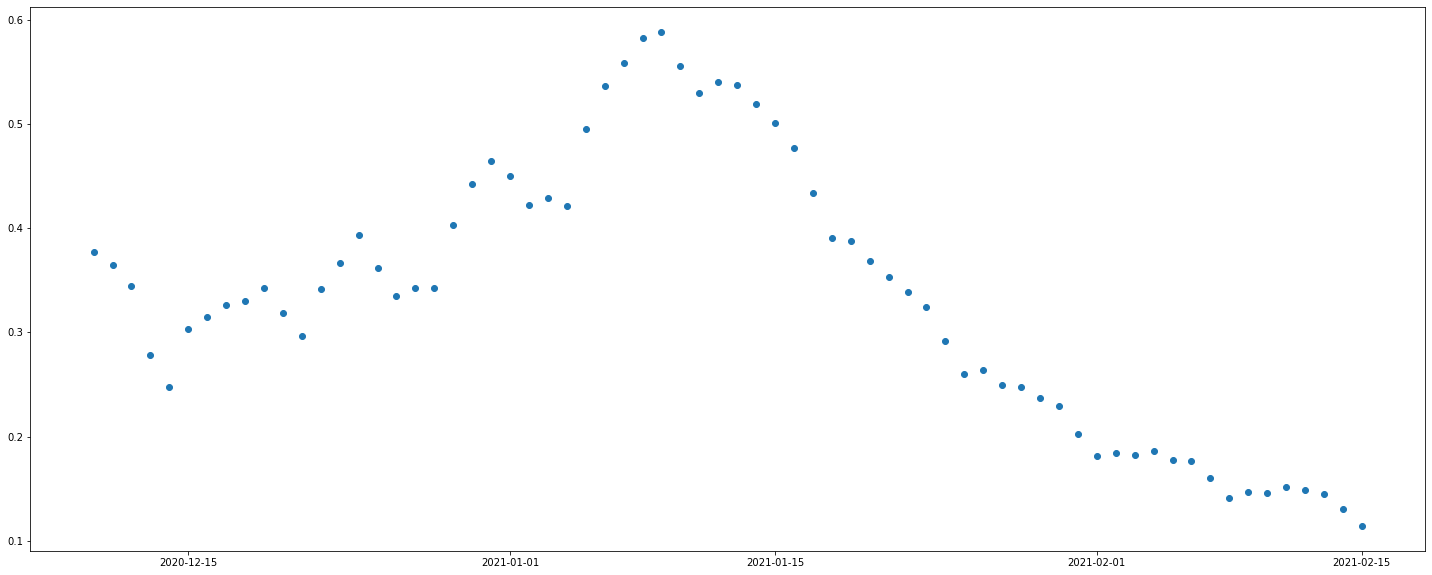

In [19]:
x3 = P3['New_cases'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled3 = min_max_scaler.fit_transform(x3.reshape(-1,1))
P3["New_cases_Nor"]=x_scaled3

reliance3 = P3['New_cases_Nor'].to_frame()
reliance3['EWMA30'] = reliance3['New_cases_Nor'].ewm(span=15).mean()

reliance3[['New_cases_Nor', 'EWMA30']].plot(label='Normalized Smoothed Peak 3',figsize=(25, 8))

plt.figure(figsize=(25,10))
plt.scatter(reliance3.index,reliance3["EWMA30"])
plt.show()


In [20]:
reliance3.EWMA30.count

<bound method Series.count of date
2020-12-10    0.376607
2020-12-11    0.364267
2020-12-12    0.344602
2020-12-13    0.277783
2020-12-14    0.247728
                ...   
2021-02-11    0.151643
2021-02-12    0.149075
2021-02-13    0.144418
2021-02-14    0.130381
2021-02-15    0.114081
Name: EWMA30, Length: 68, dtype: float64>

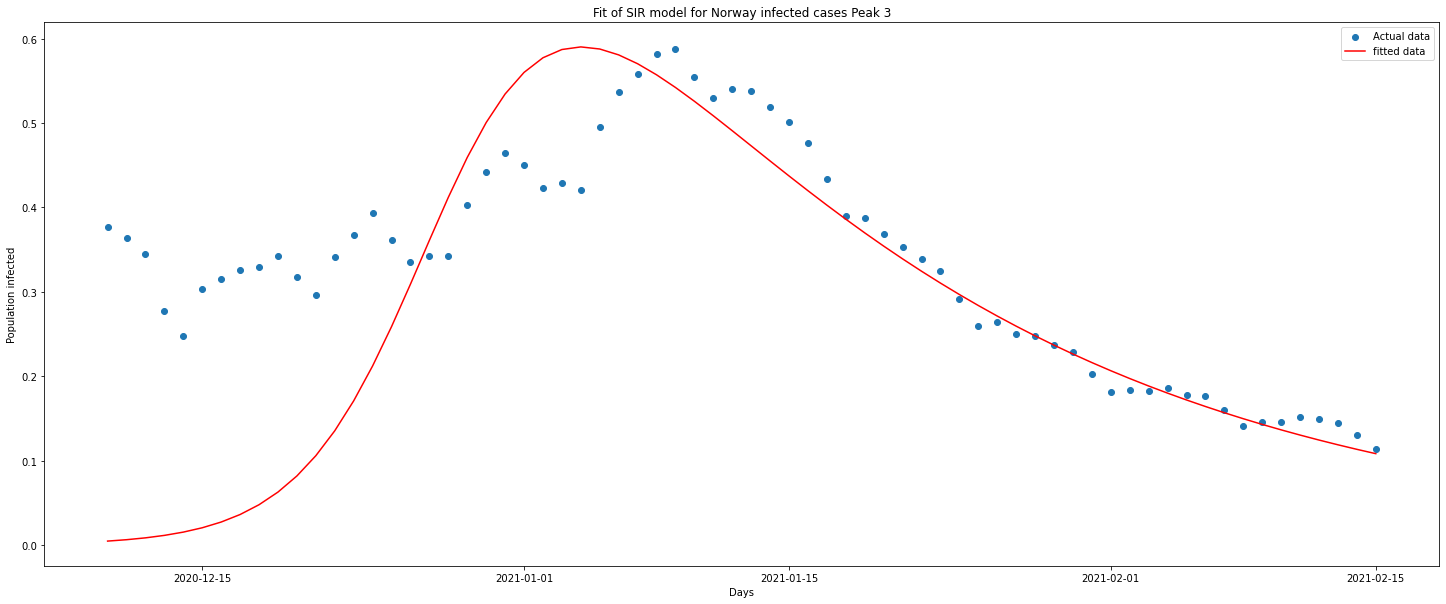

Optimal parameters: beta = 0.33529152995341227  and gamma =  0.04613765540316946


In [21]:
ydata3 = [i for i in reliance3.EWMA30]
ydata3 = np.array(ydata3, dtype=float)
xdata3 = np.linspace(0,68,68)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    beta >= 0
    gamma >= 0
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata3, ydata3)
fitted3 = fit_odeint(xdata3, *popt)

plt.figure(figsize=(25,10))
plt.scatter(reliance3.index,reliance3["EWMA30"],label='Actual data')
plt.plot(reliance3.index, fitted3,'r',label='fitted data')
plt.title("Fit of SIR model for Norway infected cases Peak 3")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.legend()
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# Peak 04 - (2021-02-15 to 2021-07-10)

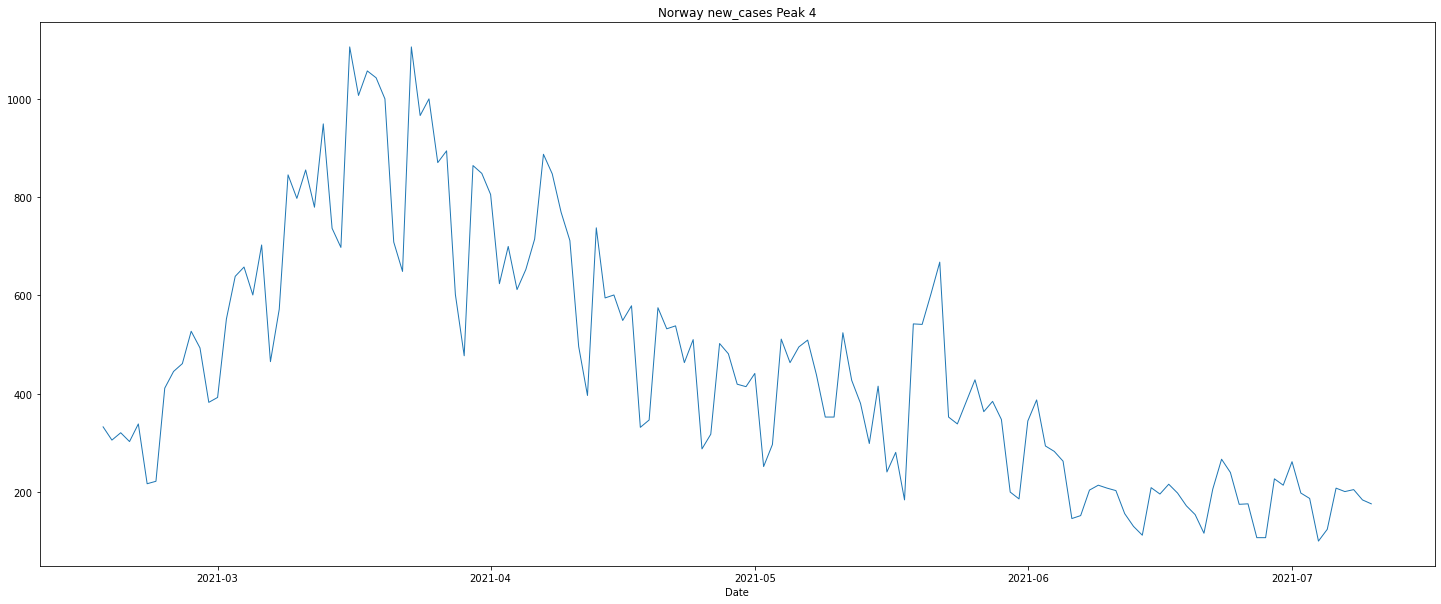

In [22]:
P4 = df.iloc[410:555,:]

plt.figure(figsize=(25,10))
plt.plot(P4["New_cases"],linewidth=1)
plt.xlabel("Date")
plt.title("Norway new_cases Peak 4")
plt.show()


<AxesSubplot:xlabel='date'>

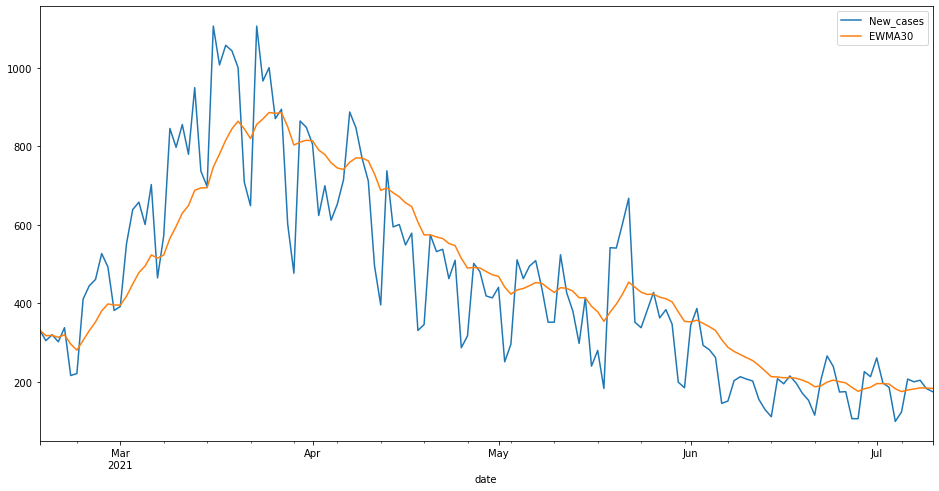

In [23]:
reliance4 = P4['New_cases'].to_frame()
reliance4['EWMA30'] = reliance4['New_cases'].ewm(span=15).mean()

reliance4[['New_cases', 'EWMA30']].plot(label='Smoothed Peak 4',figsize=(16, 8))

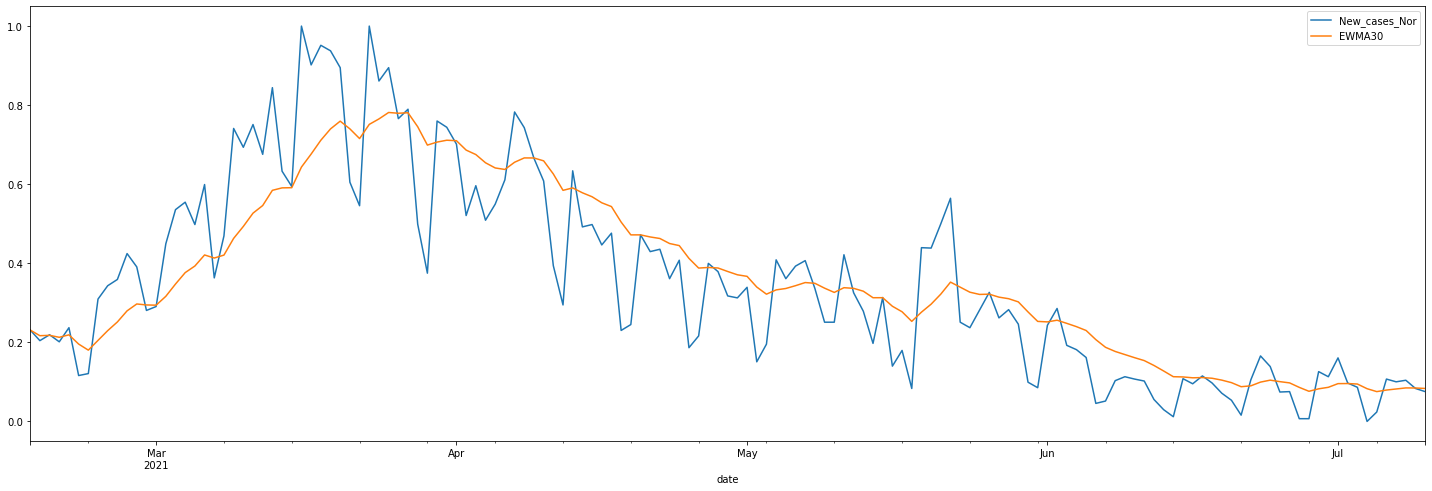

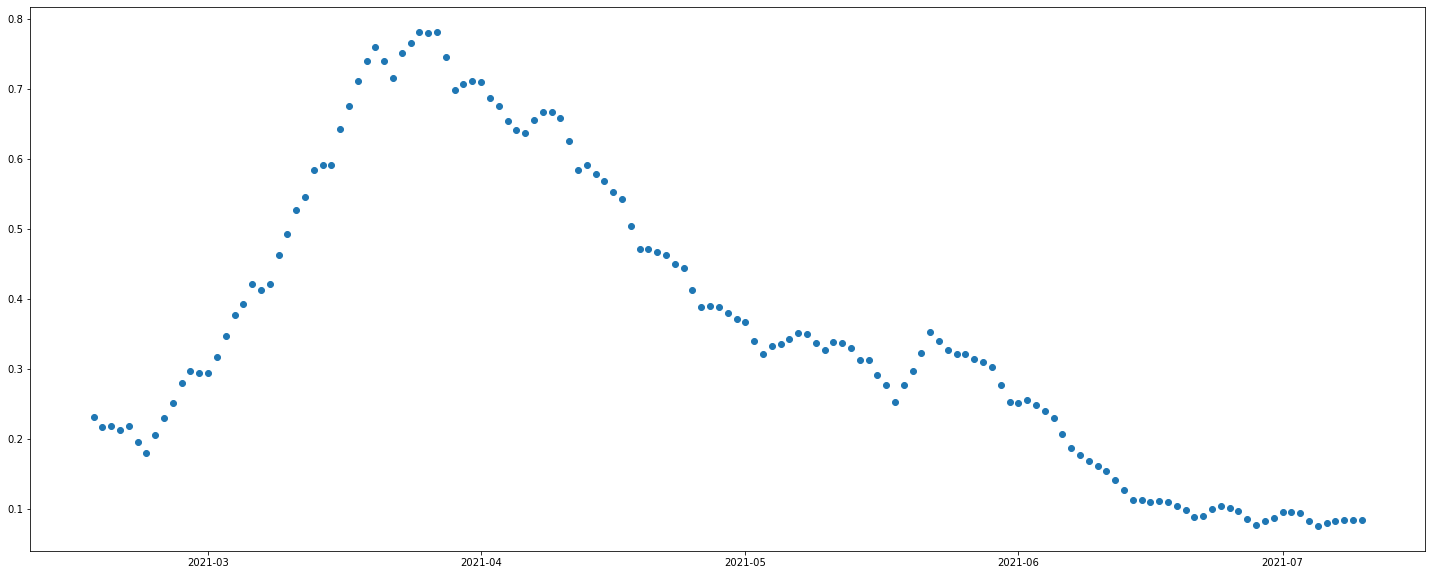

In [24]:
x4 = P4['New_cases'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled4 = min_max_scaler.fit_transform(x4.reshape(-1,1))
P4["New_cases_Nor"]=x_scaled4

reliance4 = P4['New_cases_Nor'].to_frame()
reliance4['EWMA30'] = reliance4['New_cases_Nor'].ewm(span=15).mean()

reliance4[['New_cases_Nor', 'EWMA30']].plot(label='Normalized Smoothed Peak 4',figsize=(25, 8))

plt.figure(figsize=(25,10))
plt.scatter(reliance4.index,reliance4["EWMA30"])
plt.show()


In [25]:
reliance4.EWMA30.count

<bound method Series.count of date
2021-02-16    0.231151
2021-02-17    0.216865
2021-02-18    0.217767
2021-02-19    0.212820
2021-02-20    0.219051
                ...   
2021-07-06    0.079390
2021-07-07    0.081991
2021-07-08    0.084763
2021-07-09    0.084584
2021-07-10    0.083436
Name: EWMA30, Length: 145, dtype: float64>

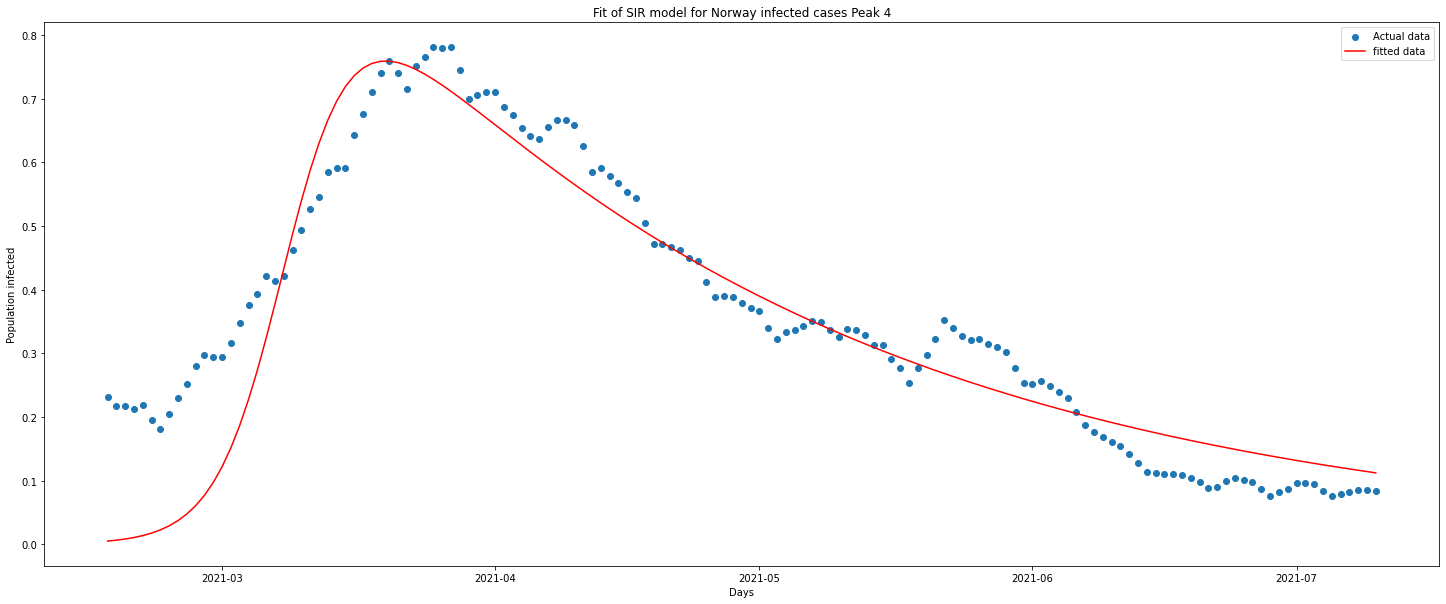

Optimal parameters: beta = 0.2747544532548121  and gamma =  0.017686024049563112


In [26]:
ydata4 = [i for i in reliance4.EWMA30]
ydata4 = np.array(ydata4, dtype=float)
xdata4 = np.linspace(0,145,145)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    beta >= 0
    gamma >= 0
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata4, ydata4)
fitted4 = fit_odeint(xdata4, *popt)

plt.figure(figsize=(25,10))
plt.scatter(reliance4.index,reliance4["EWMA30"],label='Actual data')
plt.plot(reliance4.index, fitted4,'r',label='fitted data')
plt.title("Fit of SIR model for Norway infected cases Peak 4")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.legend()
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# Peak 05 - (2021-07-10 to 2021-10-18) / Delta Variant

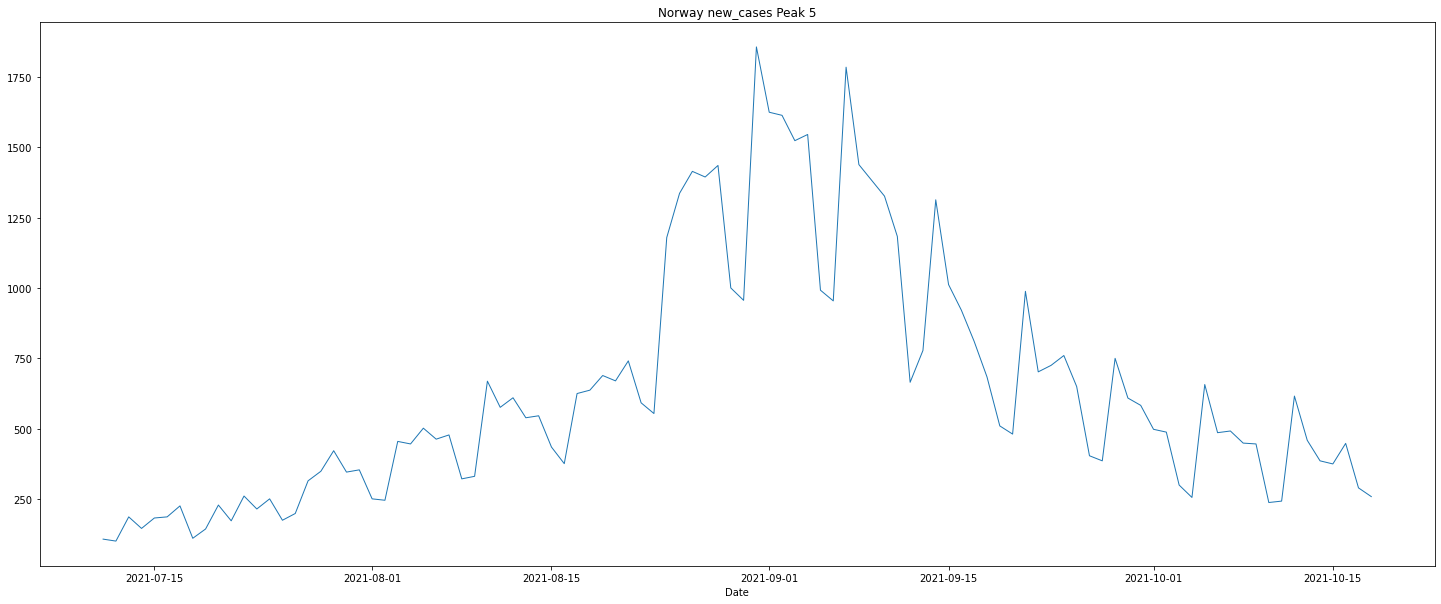

In [27]:
P5 = df.iloc[555:655,:]

plt.figure(figsize=(25,10))
plt.plot(P5["New_cases"],linewidth=1)
plt.xlabel("Date")
plt.title("Norway new_cases Peak 5")
plt.show()


<AxesSubplot:xlabel='date'>

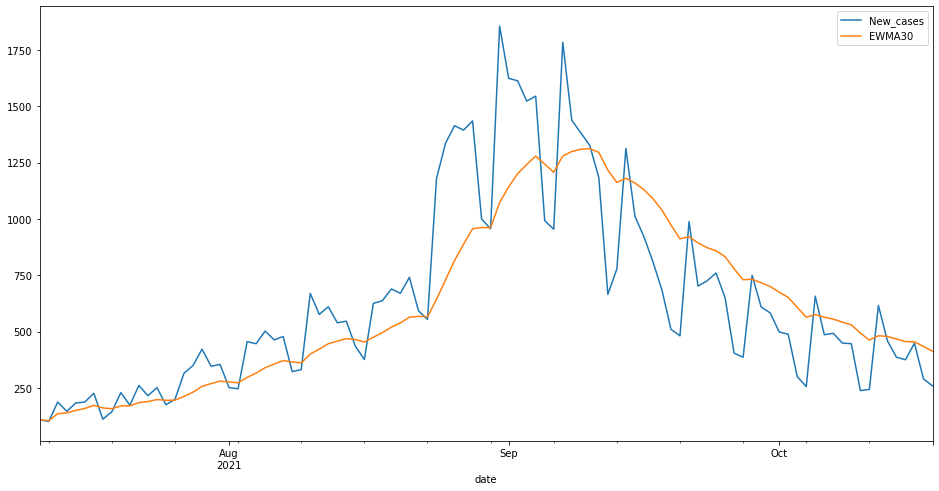

In [28]:
reliance5 = P5['New_cases'].to_frame()
reliance5['EWMA30'] = reliance5['New_cases'].ewm(span=15).mean()

reliance5[['New_cases', 'EWMA30']].plot(label='Smoothed Peak 5',figsize=(16, 8))

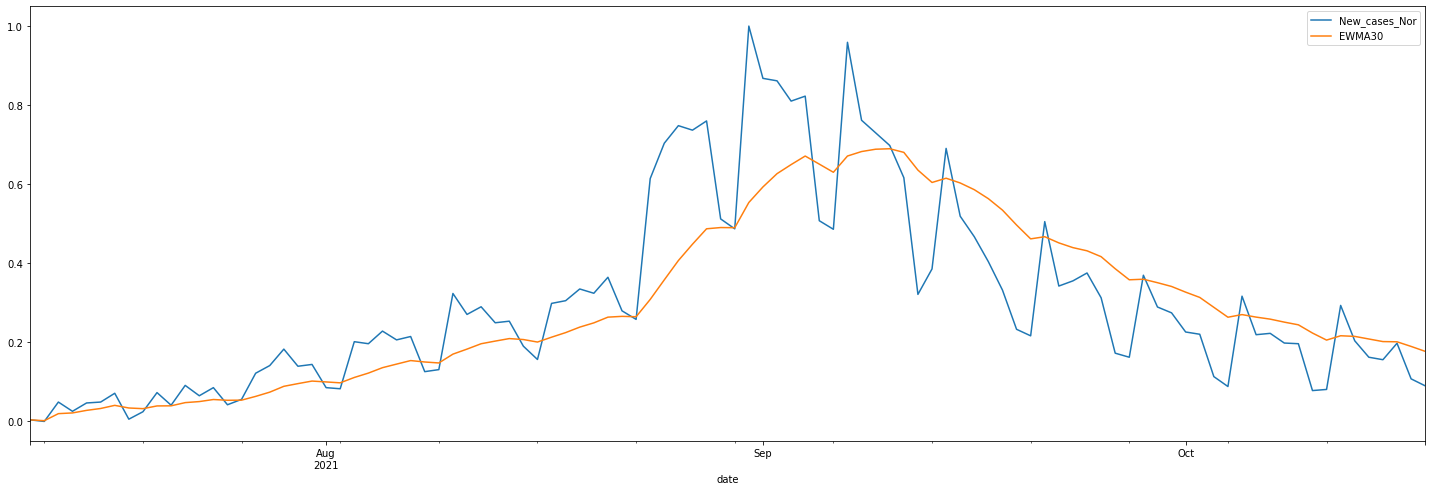

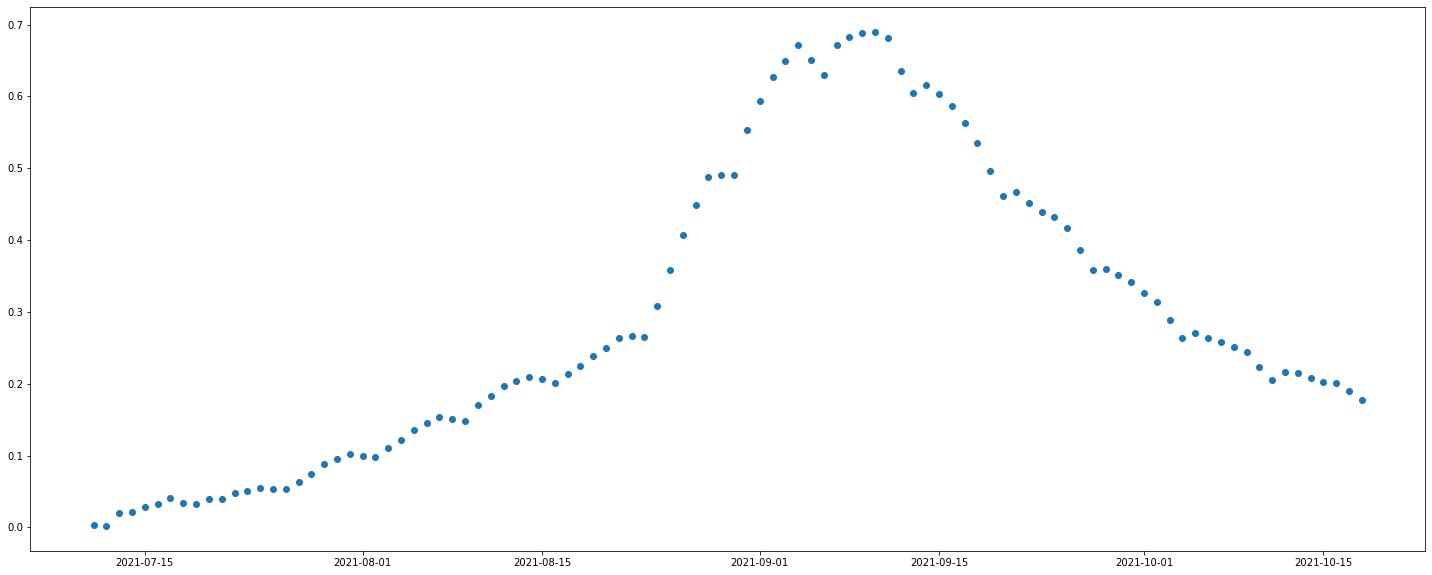

In [29]:
x5 = P5['New_cases'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled5 = min_max_scaler.fit_transform(x5.reshape(-1,1))
P5["New_cases_Nor"]=x_scaled5

reliance5 = P5['New_cases_Nor'].to_frame()
reliance5['EWMA30'] = reliance5['New_cases_Nor'].ewm(span=15).mean()

reliance5[['New_cases_Nor', 'EWMA30']].plot(label='Normalized Smoothed Peak 5',figsize=(25, 8))

plt.figure(figsize=(25,10))
plt.scatter(reliance5.index,reliance5["EWMA30"])
plt.show()

In [30]:
reliance5.EWMA30.count

<bound method Series.count of date
2021-07-11    0.003989
2021-07-12    0.001861
2021-07-13    0.019714
2021-07-14    0.021504
2021-07-15    0.027976
                ...   
2021-10-14    0.208530
2021-10-15    0.201979
2021-10-16    0.201447
2021-10-17    0.189728
2021-10-18    0.177265
Name: EWMA30, Length: 100, dtype: float64>

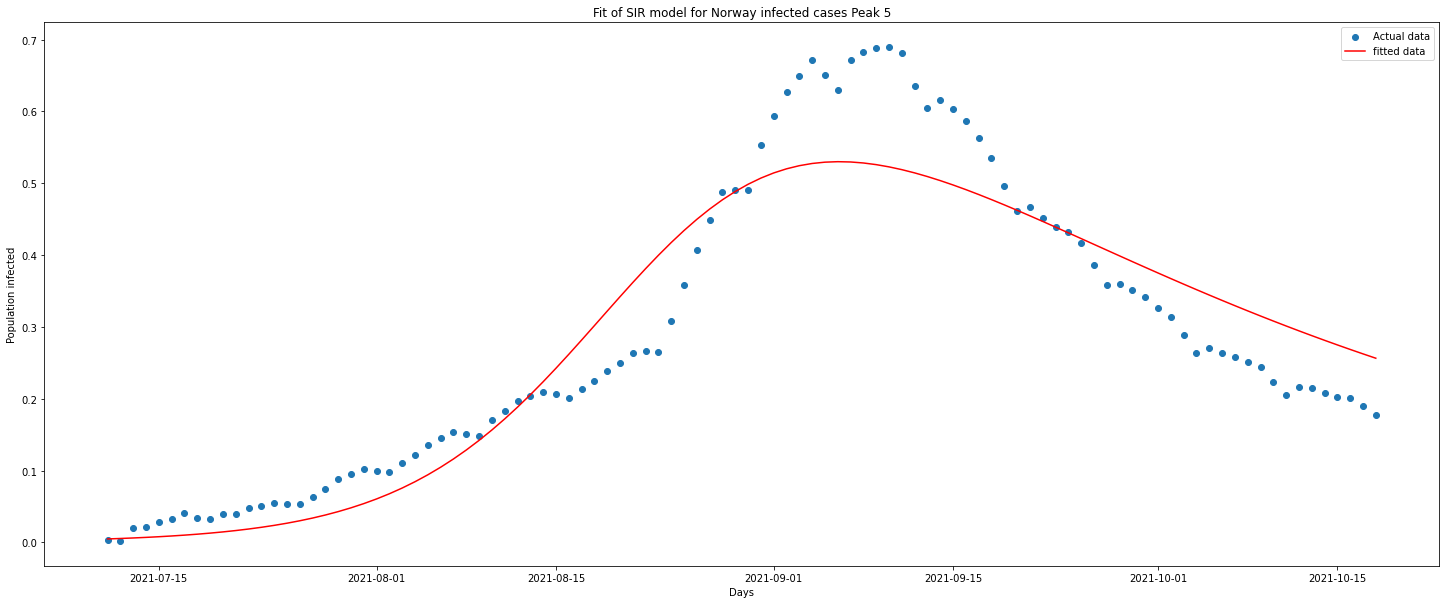

Optimal parameters: beta = 0.14796384978684046  and gamma =  0.025121274515375037


In [31]:
ydata5 = [i for i in reliance5.EWMA30]
ydata5 = np.array(ydata5, dtype=float)
xdata5 = np.linspace(0,100,100)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    beta >= 0
    gamma >= 0
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata5, ydata5)
fitted5 = fit_odeint(xdata5, *popt)

plt.figure(figsize=(25,10))
plt.scatter(reliance5.index,reliance5["EWMA30"],label='Actual data')
plt.plot(reliance5.index, fitted5,'r',label='fitted data')
plt.title("Fit of SIR model for Norway infected cases Peak 5")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.legend()
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# Peak 06 - (2021-10-18 to 2022-01-01)

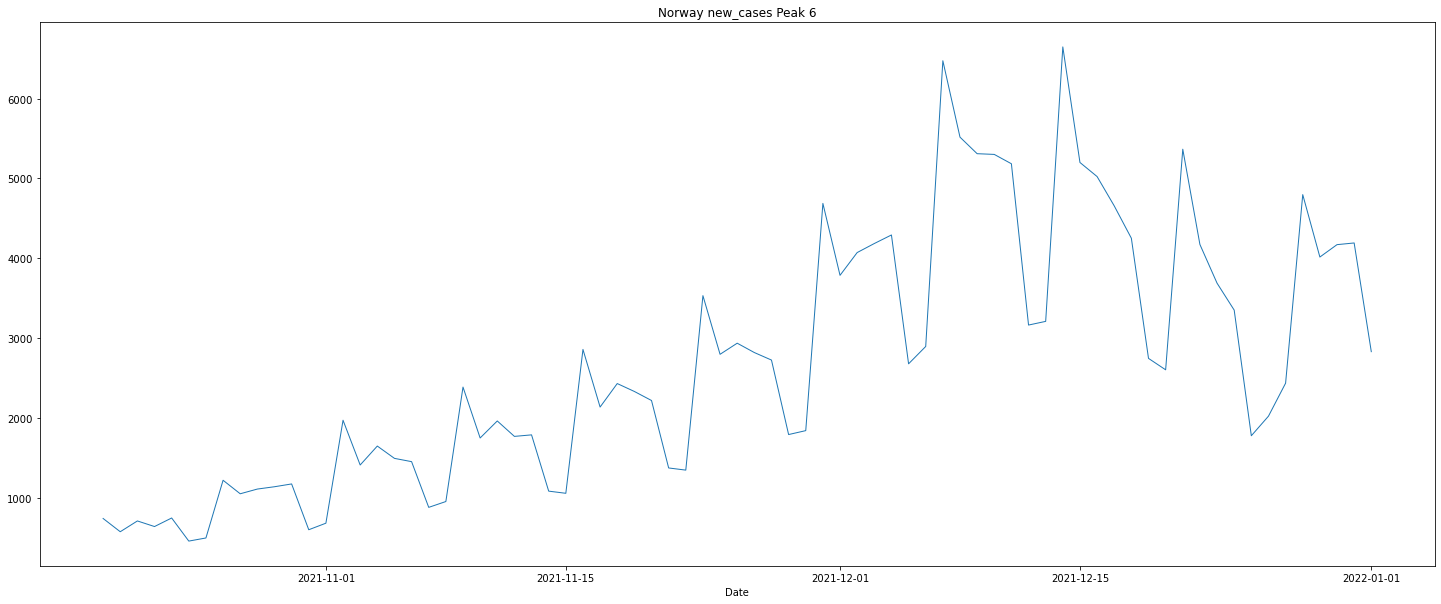

In [32]:
P6 = df.iloc[655:730,:]

plt.figure(figsize=(25,10))
plt.plot(P6["New_cases"],linewidth=1)
plt.xlabel("Date")
plt.title("Norway new_cases Peak 6")
plt.show()

<AxesSubplot:xlabel='date'>

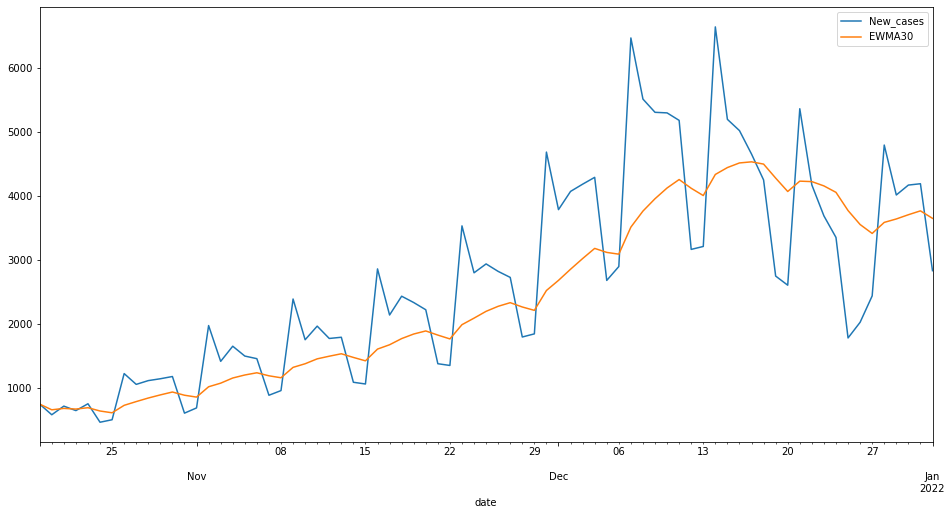

In [33]:
reliance6 = P6['New_cases'].to_frame()
reliance6['EWMA30'] = reliance6['New_cases'].ewm(span=15).mean()

reliance6[['New_cases', 'EWMA30']].plot(label='Smoothed Peak 6',figsize=(16, 8))

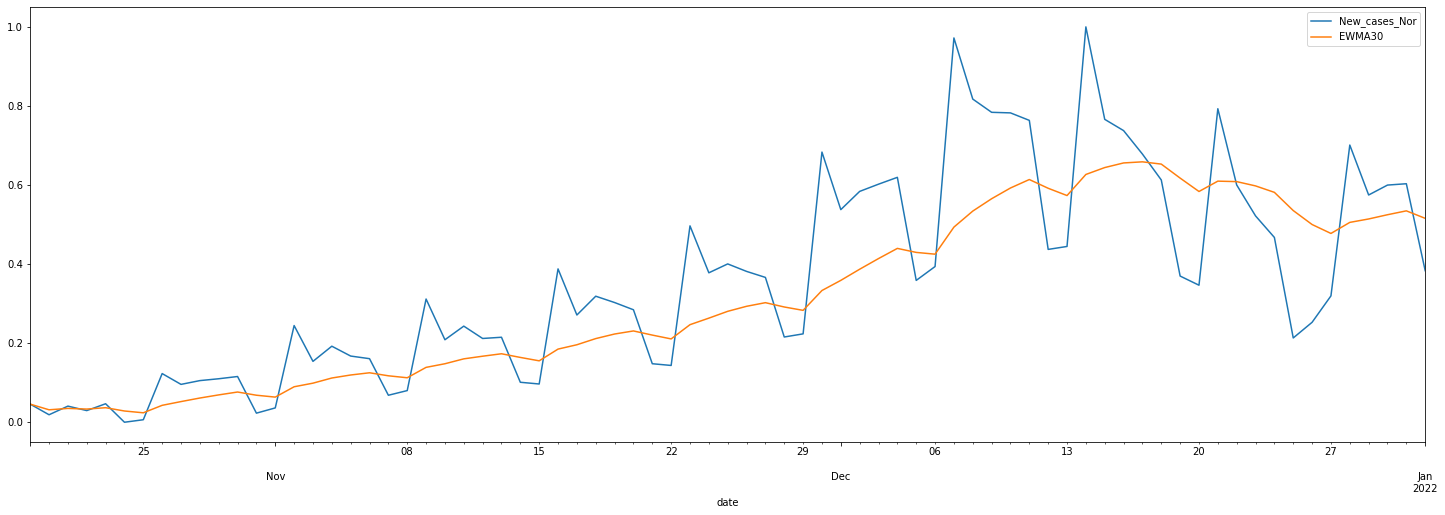

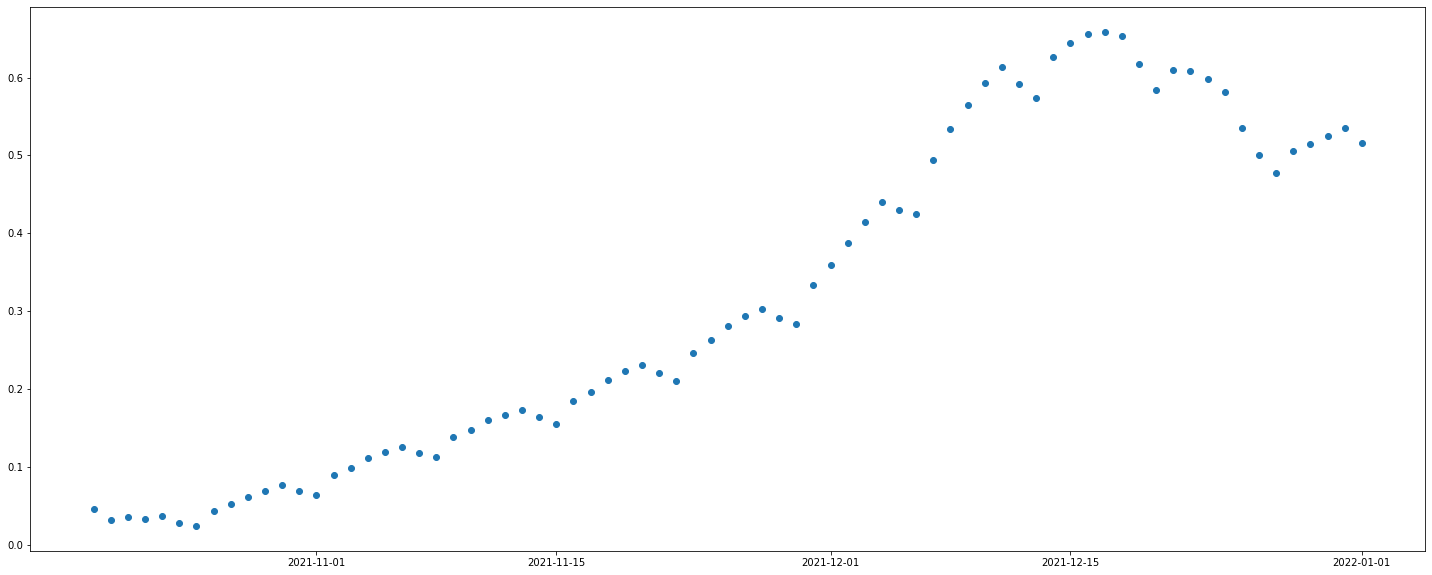

In [34]:
x6 = P6['New_cases'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled6 = min_max_scaler.fit_transform(x6.reshape(-1,1))
P6["New_cases_Nor"]=x_scaled6

reliance6 = P6['New_cases_Nor'].to_frame()
reliance6['EWMA30'] = reliance6['New_cases_Nor'].ewm(span=15).mean()

reliance6[['New_cases_Nor', 'EWMA30']].plot(label='Normalized Smoothed Peak 6',figsize=(25, 8))

plt.figure(figsize=(25,10))
plt.scatter(reliance6.index,reliance6["EWMA30"])
plt.show()

In [35]:
reliance6.EWMA30.count

<bound method Series.count of date
2021-10-19    0.045771
2021-10-20    0.031452
2021-10-21    0.034976
2021-10-22    0.033302
2021-10-23    0.036751
                ...   
2021-12-28    0.505485
2021-12-29    0.514150
2021-12-30    0.524866
2021-12-31    0.534666
2022-01-01    0.515746
Name: EWMA30, Length: 75, dtype: float64>

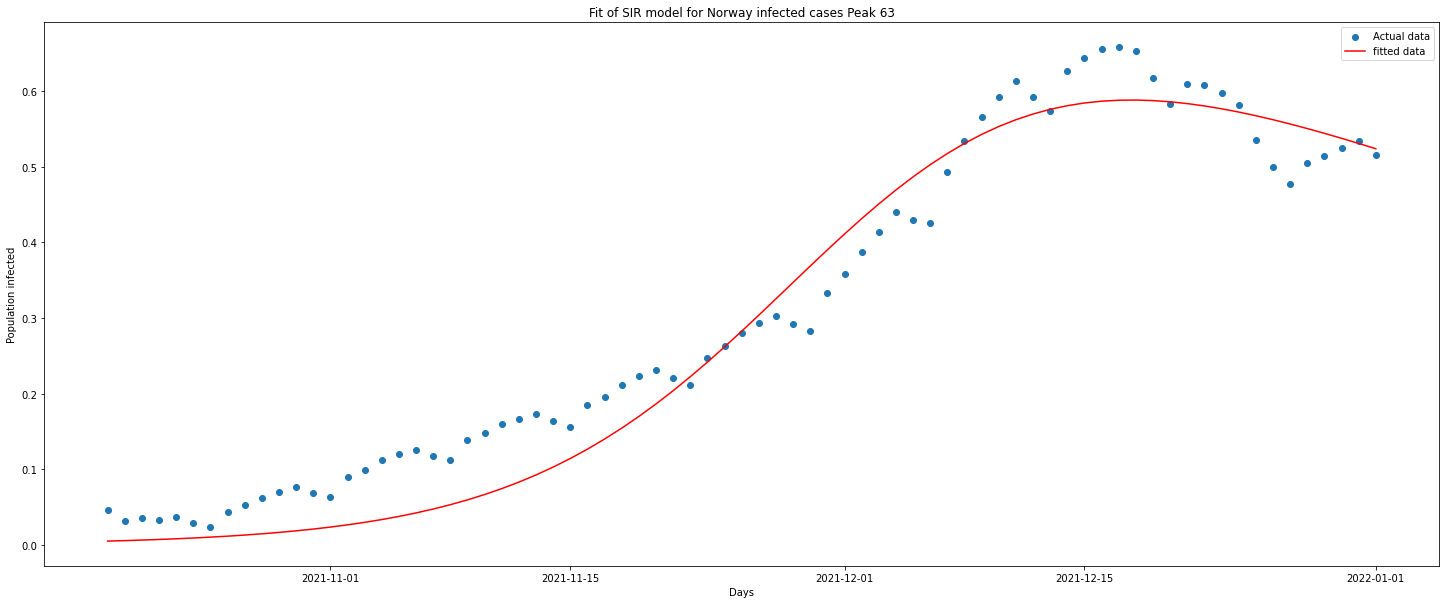

Optimal parameters: beta = 0.14064666287803373  and gamma =  0.019478538853188673


In [36]:
ydata6 = [i for i in reliance6.EWMA30]
ydata6 = np.array(ydata6, dtype=float)
xdata6 = np.linspace(0,75,75)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    beta >= 0
    gamma >= 0
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata6, ydata6)
fitted6 = fit_odeint(xdata6, *popt)

plt.figure(figsize=(25,10))
plt.scatter(reliance6.index,reliance6["EWMA30"],label='Actual data')
plt.plot(reliance6.index, fitted6,'r',label='fitted data')
plt.title("Fit of SIR model for Norway infected cases Peak 63")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.legend()
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# Peak 07 - (2022-01-01 to 2022-11-16) / Omicron Variant

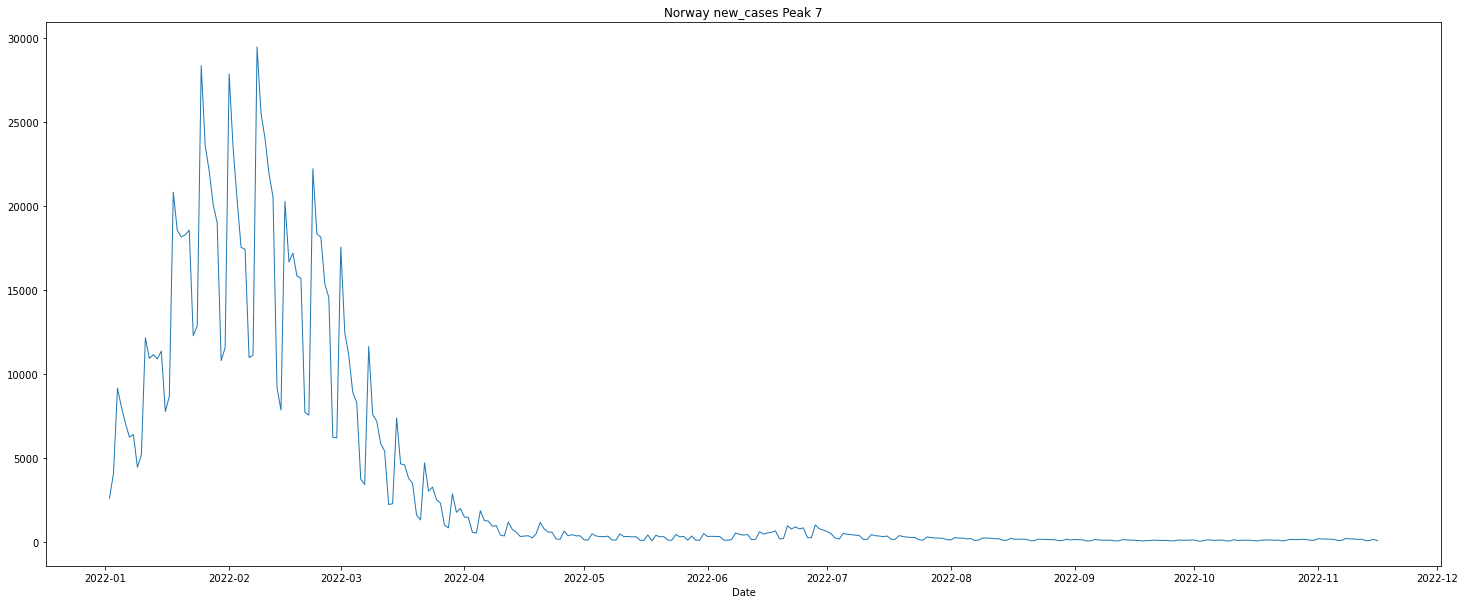

In [37]:
P7 = df.iloc[730:,:]

plt.figure(figsize=(25,10))
plt.plot(P7["New_cases"],linewidth=1)
plt.xlabel("Date")
plt.title("Norway new_cases Peak 7")
plt.show()

<AxesSubplot:xlabel='date'>

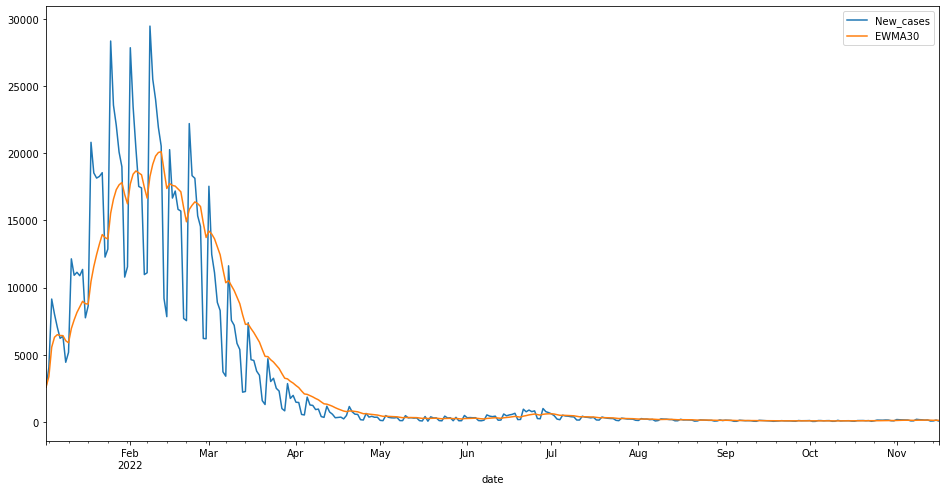

In [38]:
reliance7 = P7['New_cases'].to_frame()
reliance7['EWMA30'] = reliance7['New_cases'].ewm(span=15).mean()

reliance7[['New_cases', 'EWMA30']].plot(label='Smoothed Peak 7',figsize=(16, 8))

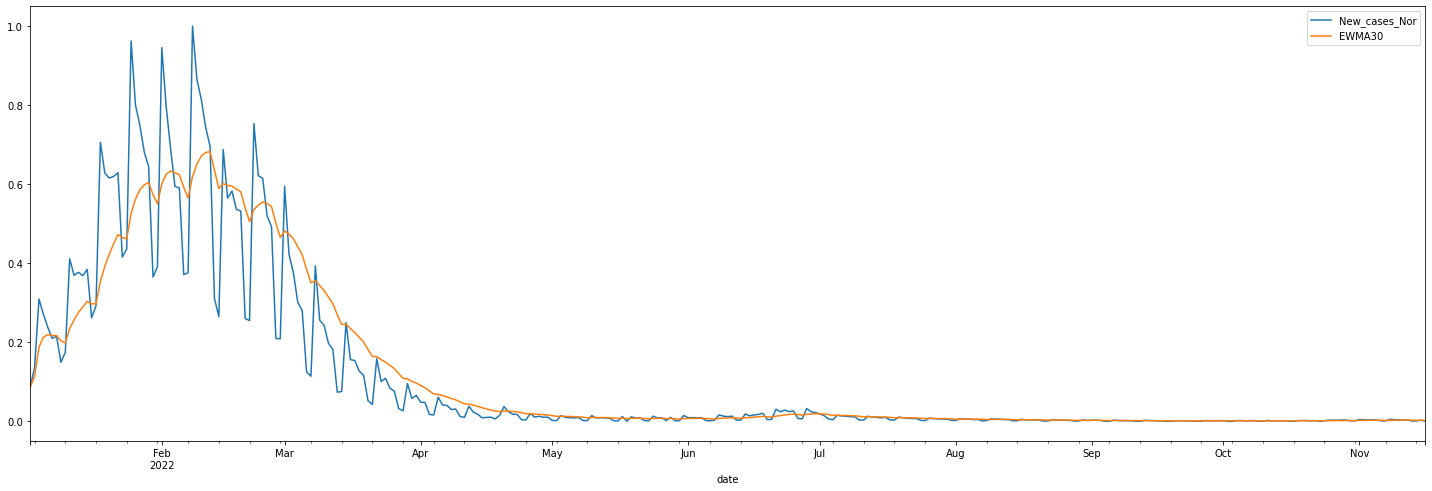

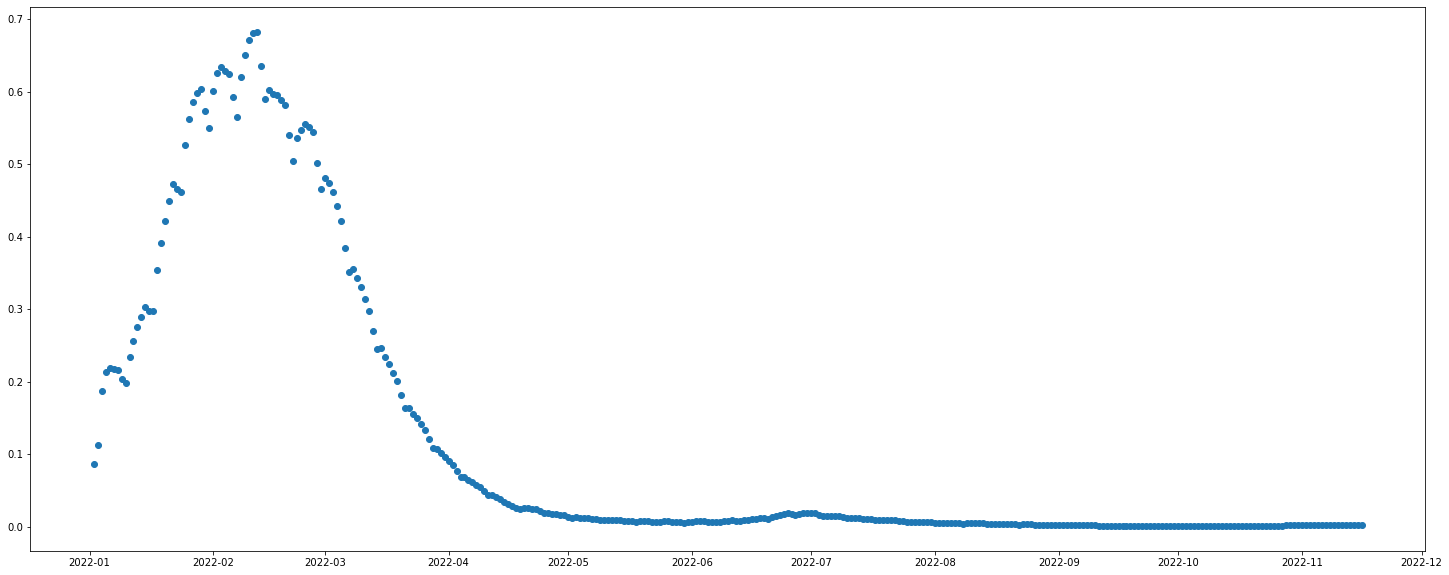

In [39]:
x7 = P7['New_cases'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled7 = min_max_scaler.fit_transform(x7.reshape(-1,1))
P7["New_cases_Nor"]=x_scaled7

reliance7 = P7['New_cases_Nor'].to_frame()
reliance7['EWMA30'] = reliance7['New_cases_Nor'].ewm(span=15).mean()

reliance7[['New_cases_Nor', 'EWMA30']].plot(label='Normalized Smoothed Peak 7',figsize=(25, 8))

plt.figure(figsize=(25,10))
plt.scatter(reliance7.index,reliance7["EWMA30"])
plt.show()

In [40]:
reliance7.EWMA30.count

<bound method Series.count of date
2022-01-02    0.086992
2022-01-03    0.113540
2022-01-04    0.187774
2022-01-05    0.212983
2022-01-06    0.219479
                ...   
2022-11-12    0.003415
2022-11-13    0.003111
2022-11-14    0.002875
2022-11-15    0.002936
2022-11-16    0.002679
Name: EWMA30, Length: 319, dtype: float64>

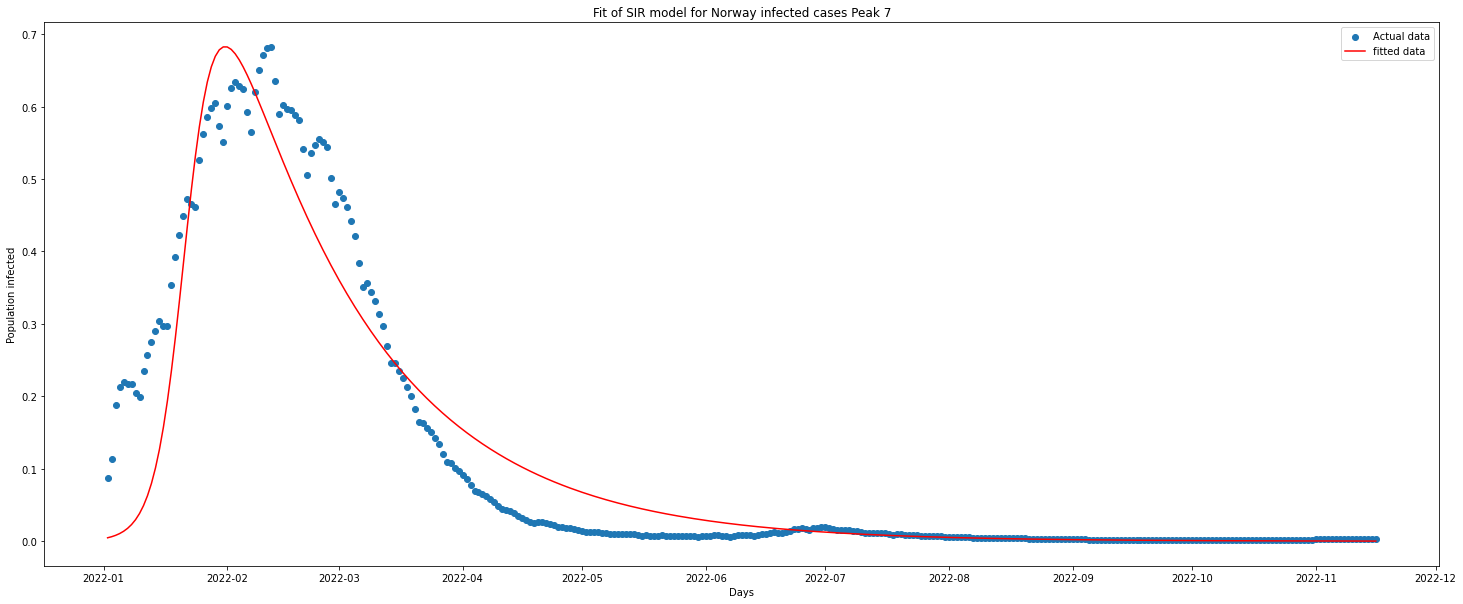

Optimal parameters: beta = 0.2900480117304902  and gamma =  0.02744252357369999


In [41]:
ydata7 = [i for i in reliance7.EWMA30]
ydata7 = np.array(ydata7, dtype=float)
xdata7 = np.linspace(0,319,319)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    beta >= 0
    gamma >= 0
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata7, ydata7)
fitted7 = fit_odeint(xdata7, *popt)

plt.figure(figsize=(25,10))
plt.scatter(reliance7.index,reliance7["EWMA30"],label='Actual data')
plt.plot(reliance7.index, fitted7,'r',label='fitted data')
plt.title("Fit of SIR model for Norway infected cases Peak 7")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.legend()
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

In [42]:
import plotly.express as px

fig = px.line(x=df.index, y=df["New_cases"])

fig.show()